<a href="https://colab.research.google.com/github/Kanvara001/python_dataviz2024/blob/main/653020200_1_%E0%B8%81%E0%B8%B1%E0%B8%8D%E0%B8%8D%E0%B9%8C%E0%B8%A7%E0%B8%A3%E0%B8%B2_%E0%B8%96%E0%B8%B2%E0%B8%A7%E0%B9%82%E0%B8%A3%E0%B8%A4%E0%B8%97%E0%B8%98%E0%B8%B4%E0%B9%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Final Metabolites Data/Xnn_ppm.pickle'

<class 'tuple'>
(array([[ 1.36984969e+07,  1.36904279e+07,  1.27889682e+07, ...,
         1.88668440e+06,  3.11779437e+06,  3.34950400e+06],
       [ 8.55679993e+06,  7.90758455e+06,  7.28975667e+06, ...,
         1.36576000e+06,  1.36576000e+06,  1.36576000e+06],
       [ 4.74035200e+06,  4.74035200e+06,  4.74035200e+06, ...,
        -2.02200274e+06, -2.32252840e+06, -3.07843664e+06],
       ...,
       [ 3.86329400e+07,  3.86329400e+07,  3.86329400e+07, ...,
        -4.37613458e+08, -4.38095321e+08, -4.40187284e+08],
       [ 9.94168277e+05,  9.94168277e+05,  9.94168277e+05, ...,
        -4.62360904e+05,  4.27633911e+05, -1.72847014e+06],
       [-1.41491086e+05, -1.41491086e+05, -1.41491086e+05, ...,
         1.16130230e+07,  1.16073431e+07,  8.35909427e+06]]), array([10.87128   , 10.87109488, 10.87090976, ..., -1.26026981,
       -1.26045493, -1.26064005]))
X shape: (51, 65536), ppm shape: (65536,)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


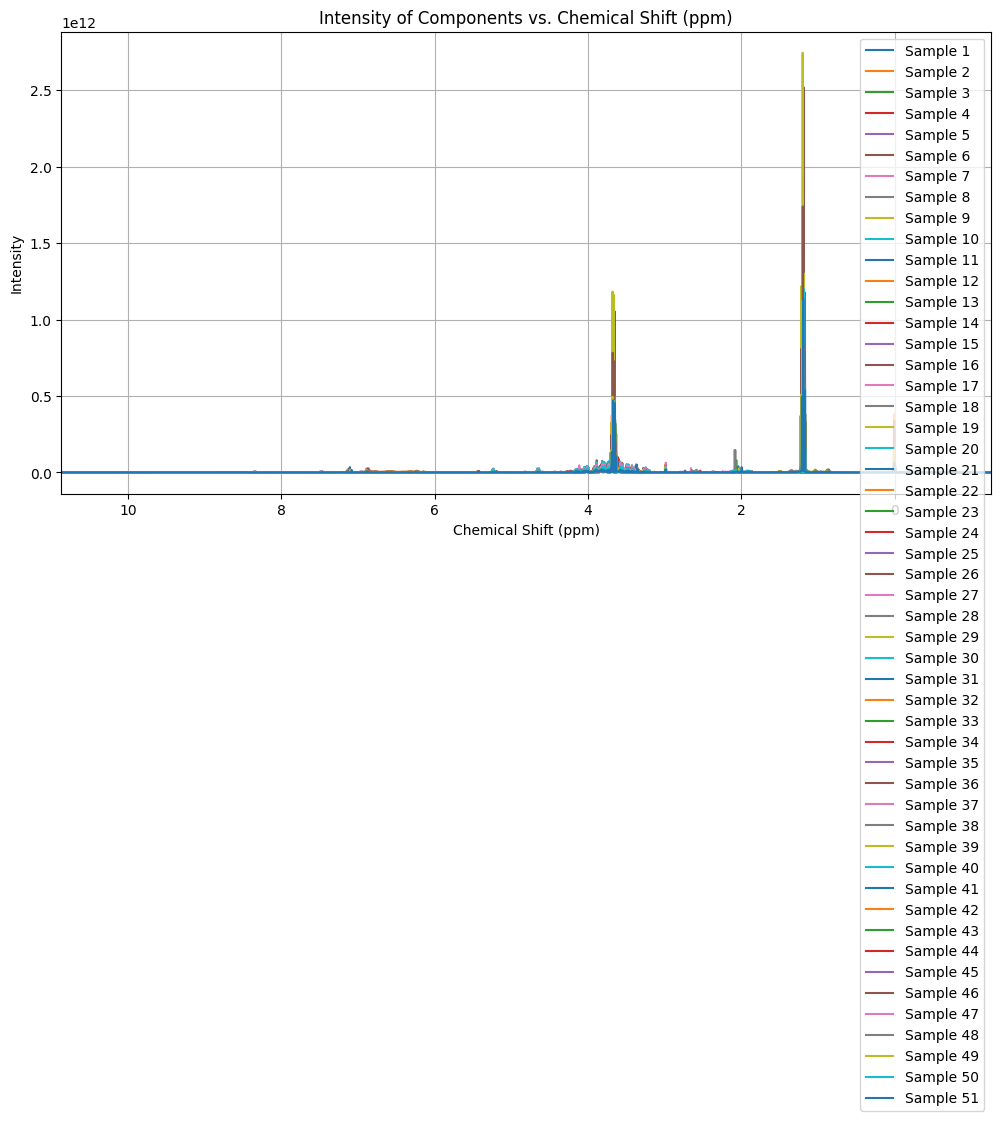

In [5]:
# โหลดข้อมูลจากไฟล์ pickle
with open(path, 'rb') as f:
    data = pickle.load(f)

# แสดงข้อมูลที่โหลด
print(type(data))  # ตรวจสอบชนิดของข้อมูล
print(data)        # แสดงค่าของข้อมูล

# หาก data เป็น tuple สามารถแยกออกได้ด้วยการระบุ index
# สมมุติว่า data เป็น tuple ที่มี X ที่ index 0 และ ppm ที่ index 1
X = data[0]  # ข้อมูลความเข้มข้น
ppm = data[1]  # ค่า Chemical shift

# ตรวจสอบขนาดข้อมูล
print(f"X shape: {X.shape}, ppm shape: {ppm.shape}")

# Plot ข้อมูลความเข้มข้นในแต่ละช่วงของ ppm
plt.figure(figsize=(12, 6))
for i in range(X.shape[0]):
    plt.plot(ppm, X[i], label=f'Sample {i + 1}')

plt.title('Intensity of Components vs. Chemical Shift (ppm)')
plt.xlabel('Chemical Shift (ppm)')
plt.ylabel('Intensity')
plt.xlim(ppm[0], ppm[-1])
plt.legend()
plt.grid()
plt.show()

<class 'tuple'>
(array([[ 1.36984969e+07,  1.36904279e+07,  1.27889682e+07, ...,
         1.88668440e+06,  3.11779437e+06,  3.34950400e+06],
       [ 8.55679993e+06,  7.90758455e+06,  7.28975667e+06, ...,
         1.36576000e+06,  1.36576000e+06,  1.36576000e+06],
       [ 4.74035200e+06,  4.74035200e+06,  4.74035200e+06, ...,
        -2.02200274e+06, -2.32252840e+06, -3.07843664e+06],
       ...,
       [ 3.86329400e+07,  3.86329400e+07,  3.86329400e+07, ...,
        -4.37613458e+08, -4.38095321e+08, -4.40187284e+08],
       [ 9.94168277e+05,  9.94168277e+05,  9.94168277e+05, ...,
        -4.62360904e+05,  4.27633911e+05, -1.72847014e+06],
       [-1.41491086e+05, -1.41491086e+05, -1.41491086e+05, ...,
         1.16130230e+07,  1.16073431e+07,  8.35909427e+06]]), array([10.87128   , 10.87109488, 10.87090976, ..., -1.26026981,
       -1.26045493, -1.26064005]))
Original X shape: (51, 65536), ppm shape: (65536,)
Filtered X shape: (51, 51318), filtered ppm shape: (51318,)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


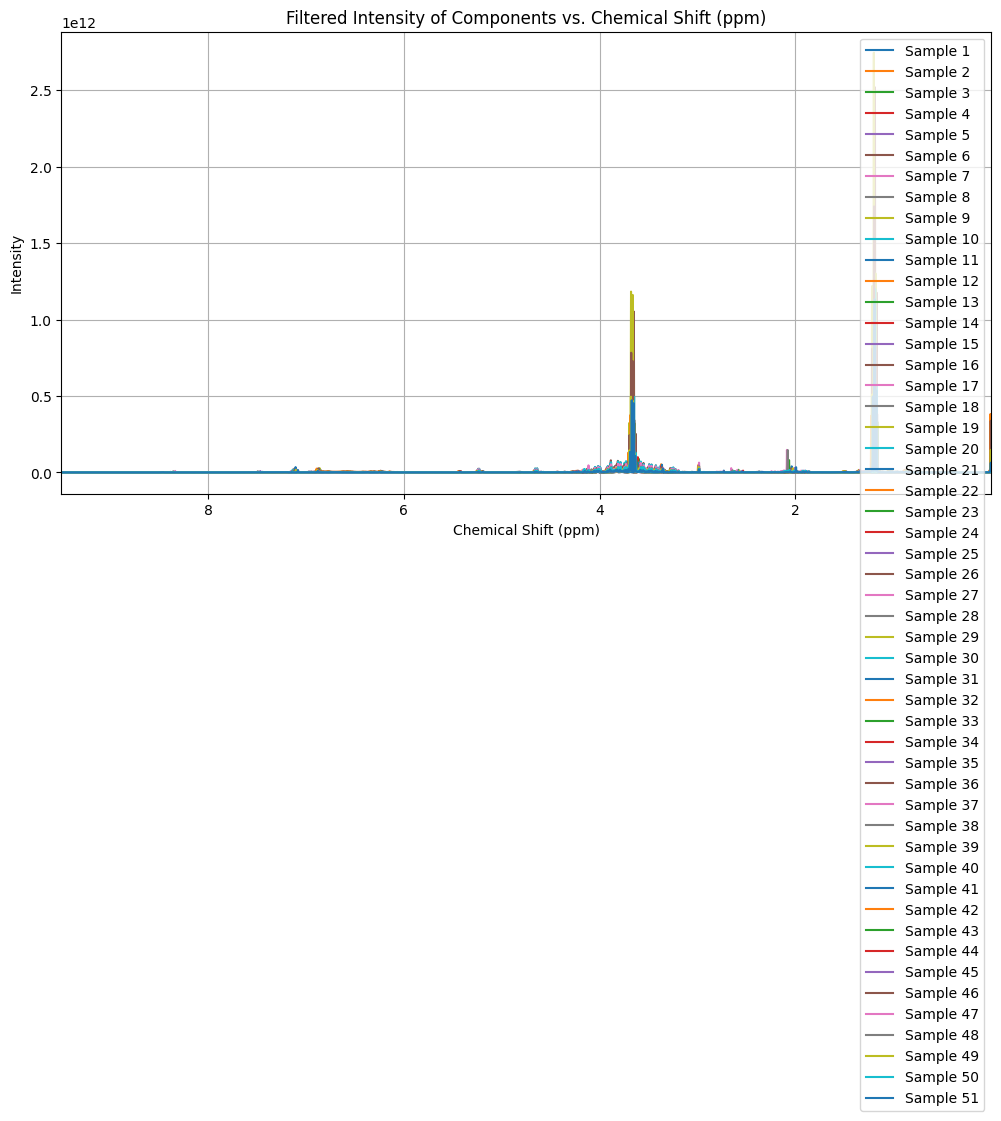

In [6]:
# ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm น้อยกว่าเท่ากับ 0 และ ppm มากกว่าเท่ากับ 9.5)
# ตรวจสอบโครงสร้างข้อมูลที่โหลด
print(type(data))  # ตรวจสอบชนิดของข้อมูล
print(data)        # แสดงค่าของข้อมูล

# แยกข้อมูลที่แท้จริง
X = data[0]  # ค่า X (ความเข้มข้น)
ppm = data[1]  # ค่า ppm (Chemical shift)

# ตรวจสอบขนาดข้อมูลก่อนการกรอง
print(f"Original X shape: {X.shape}, ppm shape: {ppm.shape}")

# ตัดข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm <= 0 และ ppm >= 9.5)
mask = (ppm > 0) & (ppm < 9.5)
ppm_filtered = ppm[mask]
X_filtered = X[:, mask]  # ตัดข้อมูล X ตาม mask

# ตรวจสอบขนาดข้อมูลหลังการกรอง
print(f"Filtered X shape: {X_filtered.shape}, filtered ppm shape: {ppm_filtered.shape}")

# Plot ข้อมูลความเข้มข้นในช่วงที่กรอง
plt.figure(figsize=(12, 6))
for i in range(X_filtered.shape[0]):
    plt.plot(ppm_filtered, X_filtered[i], label=f'Sample {i + 1}')

plt.title('Filtered Intensity of Components vs. Chemical Shift (ppm)')
plt.xlabel('Chemical Shift (ppm)')
plt.ylabel('Intensity')
plt.xlim(ppm_filtered[0], ppm_filtered[-1])
plt.legend()
plt.grid()
plt.show()


In [14]:
import numpy as np

# X_filtered คือค่าความเข้มข้นที่ได้หลังจากกรองแล้ว
# X_filtered มีขนาด (51, 65536)

# ขนาดใหม่ที่ต้องการ
new_shape = (51, 400)

# คำนวณขนาดของ block
block_size = X_filtered.shape[1] // new_shape[1]  # ขนาด block ที่ใช้ในการรวม
# ขนาดของ block ที่คำนวณได้
print(f"Block size: {block_size}")

# ทำ quantization โดยการใช้ max ในแต่ละ block
X_quantized = np.zeros(new_shape)

for i in range(X_filtered.shape[0]):  # สำหรับแต่ละ row ใน X
    for j in range(new_shape[1]):  # สำหรับแต่ละ block
        start_index = j * block_size
        end_index = start_index + block_size
        # ตรวจสอบว่า index ไม่เกินขนาดข้อมูล
        if end_index <= X_filtered.shape[1]:
            X_quantized[i, j] = np.max(X_filtered[i, start_index:end_index])
        else:
            # ถ้าหากข้อมูลหมด ให้ใช้ค่า max ของข้อมูลที่เหลือ
            X_quantized[i, j] = np.max(X_filtered[i, start_index:])

# แสดงผลลัพธ์
print("Quantized data shape:", X_quantized.shape)


Block size: 128
Quantized data shape: (51, 400)


Quantized X shape: (51, 400)


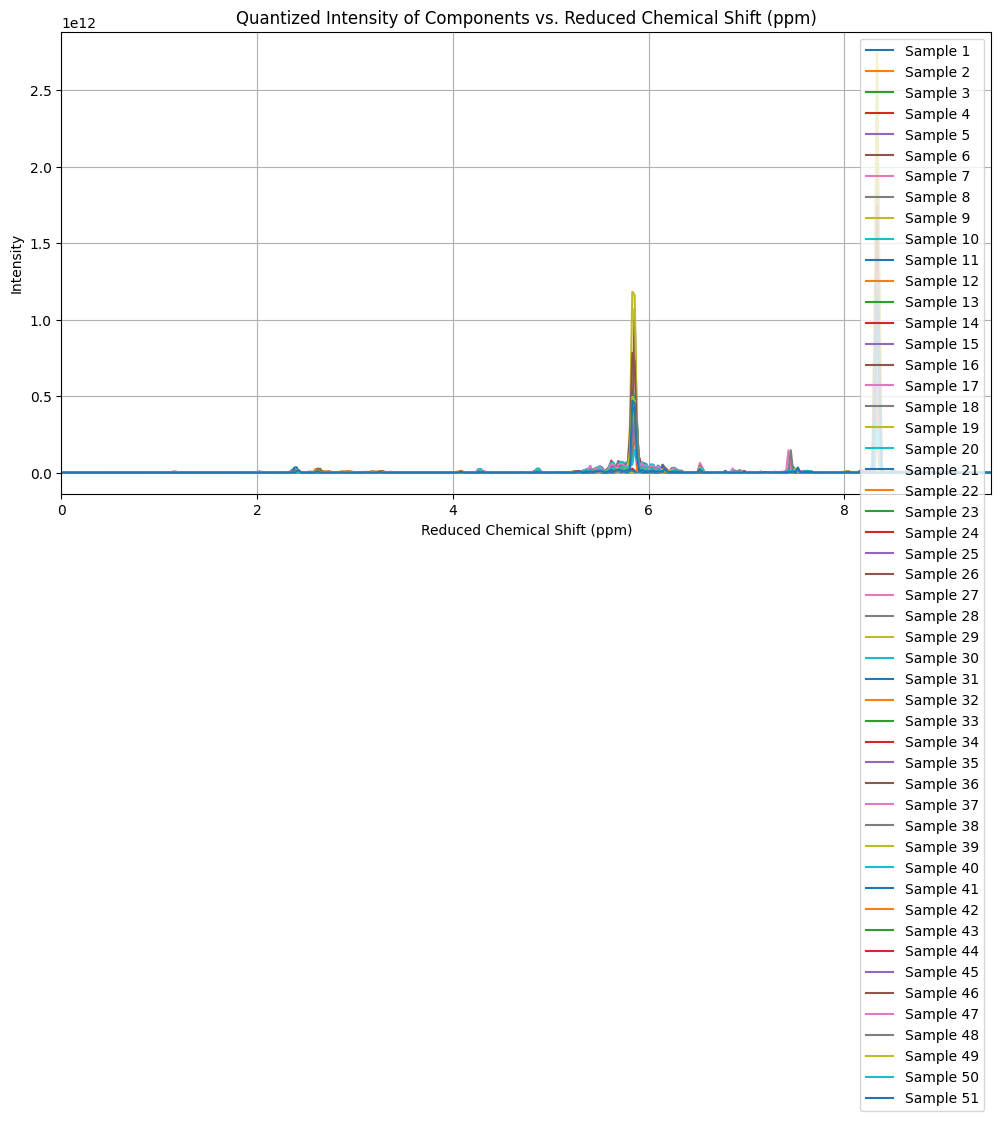

In [17]:
import numpy as np

#  X_filtered มีขนาด (51, 65536)
# และต้องการให้เหลือขนาด (51, 400)

# ขนาดใหม่
new_shape = (51, 400)

# คำนวณขนาดของ block
block_size_x = X_filtered.shape[1] // new_shape[1]  # 65536 / 400

# ทำ quantization โดยการใช้ max ในแต่ละ block
X_quantized = np.zeros(new_shape)

for i in range(X_filtered.shape[0]):  # สำหรับแต่ละ row ใน X
    for j in range(new_shape[1]):  # สำหรับแต่ละ block
        start_index = j * block_size_x
        end_index = start_index + block_size_x
        X_quantized[i, j] = np.max(X_filtered[i, start_index:end_index])

# ตรวจสอบขนาดข้อมูลหลังจากการ quantization
print(f"Quantized X shape: {X_quantized.shape}")

# Plot ข้อมูลหลังการ quantization
plt.figure(figsize=(12, 6))
for i in range(X_quantized.shape[0]):
    plt.plot(np.linspace(0, 9.5, new_shape[1]), X_quantized[i], label=f'Sample {i + 1}')

plt.title('Quantized Intensity of Components vs. Reduced Chemical Shift (ppm)')
plt.xlabel('Reduced Chemical Shift (ppm)')
plt.ylabel('Intensity')
plt.xlim(0, 9.5)
plt.legend()
plt.grid()
plt.show()


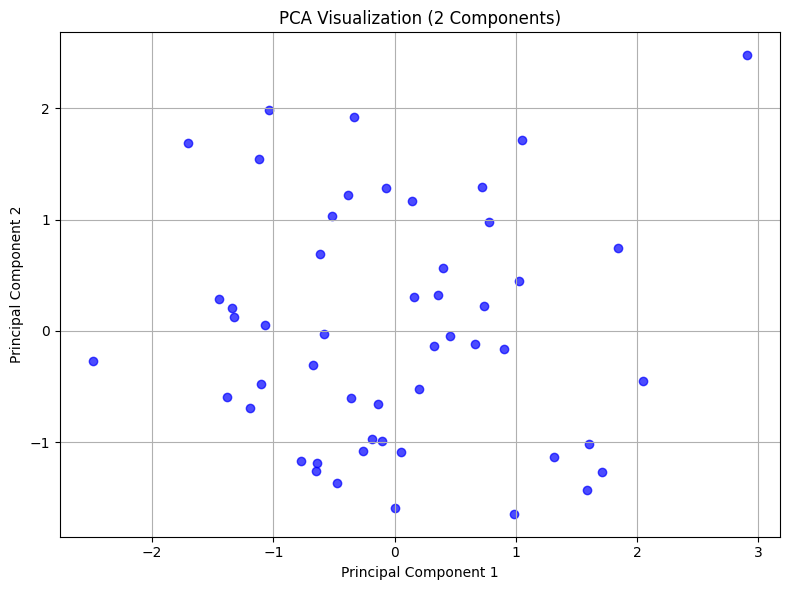

Explained variance by component: [0.03491258 0.03344012]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# จำลองข้อมูล X ขนาด 51 x 400
np.random.seed(0)
X = np.random.rand(51, 400)  # ข้อมูลความเข้มข้น

# ทำ PCA เพื่อลดมิติข้อมูลลงเหลือ 2 มิติ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# แสดงผล PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o', alpha=0.7)
plt.title('PCA Visualization (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.tight_layout()  # ทำให้กราฟไม่ตัดขอบ
plt.show()

# แสดง variance explained by each component
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')


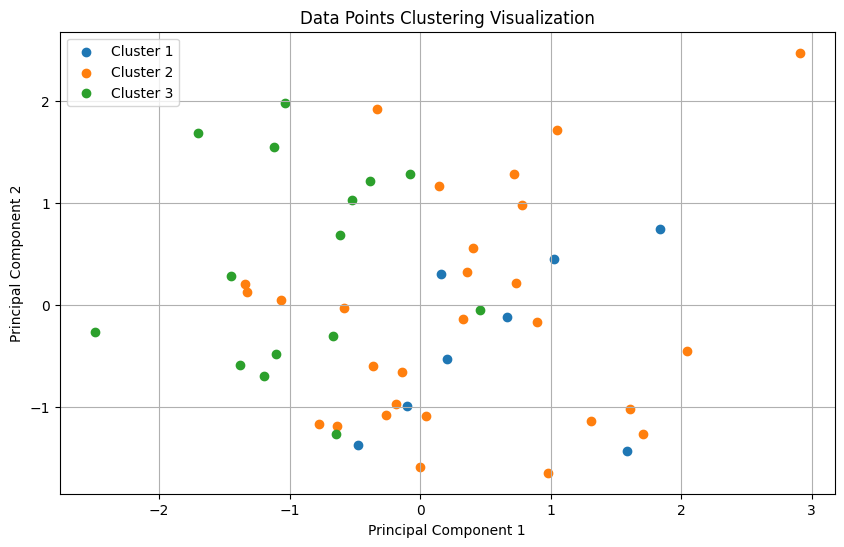

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# สมมติข้อมูล X ขนาด 51 x 400 (ตัวอย่าง)
np.random.seed(0)
X = np.random.rand(51, 400)  # ข้อมูลความเข้มข้น

# ทำ KMeans clustering
n_clusters = 3  # ปรับจำนวนกลุ่มตามความเหมาะสม
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# ทำ PCA เพื่อลดมิติข้อมูลให้เป็น 2 มิติ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# แสดงผลข้อมูลที่จัดกลุ่ม
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(X_pca[labels == cluster, 0],
                X_pca[labels == cluster, 1],
                label=f'Cluster {cluster + 1}')

plt.title('Data Points Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()


In [23]:
# สร้าง DataFrame จากข้อมูลและ labels
df = pd.DataFrame(X)
df['Cluster'] = labels  # เพิ่มคอลัมน์ Cluster

# แสดงผลตาราง
df


,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Cluster
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442,...,0.424032,0.258684,0.849038,0.033305,0.958983,0.355369,0.356707,0.016329,0.185232,1
1,0.401260,0.929291,0.099615,0.945302,0.869489,0.454162,0.326701,0.232744,0.614465,0.033075,...,0.246557,0.596433,0.117526,0.975884,0.932561,0.391797,0.242179,0.250398,0.483394,1
2,0.039993,0.639705,0.408303,0.377407,0.809365,0.709035,0.954334,0.351936,0.897543,0.769967,...,0.911451,0.276337,0.369524,0.379894,0.560451,0.668218,0.286717,0.019462,0.399222,1
3,0.308528,0.942185,0.888265,0.860311,0.653000,0.344289,0.548849,0.815225,0.098610,0.801075,...,0.821015,0.373055,0.196852,0.098760,0.748606,0.452654,0.713718,0.915408,0.146584,2
4,0.919171,0.411626,0.305267,0.943062,0.990652,0.198892,0.656838,0.106495,0.650914,0.827313,...,0.875200,0.027653,0.660339,0.414439,0.791282,0.721198,0.480108,0.643864,0.501773,2
5,0.811518,0.476084,0.523156,0.250521,0.605043,0.302905,0.577284,0.169678,0.159469,0.417030,...,0.815618,0.750343,0.287834,0.494972,0.186212,0.188400,0.435841,0.738592,0.526584,0
6,0.886683,0.830909,0.031605,0.568419,0.609161,0.961575,0.023237,0.531104,0.204781,0.053663,...,0.690211,0.866661,0.104092,0.305695,0.694291,0.022018,0.734076,0.857979,0.453304,2
7,0.434330,0.278469,0.005052,0.186304,0.979864,0.867286,0.266505,0.963749,0.367713,0.297585,...,0.240545,0.594648,0.928642,0.719852,0.767361,0.950893,0.634091,0.577731,0.601868,2
8,0.865805,0.388099,0.795336,0.652257,0.304572,0.013688,0.209920,0.699989,0.579690,0.274595,...,0.125422,0.610462,0.240352,0.336721,0.408832,0.116195,0.963094,0.973764,0.445002,0
9,0.257466,0.958594,0.818057,0.724229,0.461812,0.410579,0.779349,0.519614,0.660582,0.566193,...,0.241751,0.187770,0.404680,0.119904,0.349639,0.434874,0.830003,0.932806,0.308338,2


In [29]:
# สร้างตารางที่มีความชัดเจนและอ่านง่ายขึ้น
# กำหนดชื่อคอลัมน์ให้ชัดเจน
column_names = [f'Feature {i+1}' for i in range(400)] + ['Cluster']
df.columns = column_names
# แสดง DataFrame ที่มีชื่อคอลัมน์ใหม่
df


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 392,Feature 393,Feature 394,Feature 395,Feature 396,Feature 397,Feature 398,Feature 399,Feature 400,Cluster
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442,...,0.424032,0.258684,0.849038,0.033305,0.958983,0.355369,0.356707,0.016329,0.185232,1
1,0.401260,0.929291,0.099615,0.945302,0.869489,0.454162,0.326701,0.232744,0.614465,0.033075,...,0.246557,0.596433,0.117526,0.975884,0.932561,0.391797,0.242179,0.250398,0.483394,1
2,0.039993,0.639705,0.408303,0.377407,0.809365,0.709035,0.954334,0.351936,0.897543,0.769967,...,0.911451,0.276337,0.369524,0.379894,0.560451,0.668218,0.286717,0.019462,0.399222,1
3,0.308528,0.942185,0.888265,0.860311,0.653000,0.344289,0.548849,0.815225,0.098610,0.801075,...,0.821015,0.373055,0.196852,0.098760,0.748606,0.452654,0.713718,0.915408,0.146584,2
4,0.919171,0.411626,0.305267,0.943062,0.990652,0.198892,0.656838,0.106495,0.650914,0.827313,...,0.875200,0.027653,0.660339,0.414439,0.791282,0.721198,0.480108,0.643864,0.501773,2
5,0.811518,0.476084,0.523156,0.250521,0.605043,0.302905,0.577284,0.169678,0.159469,0.417030,...,0.815618,0.750343,0.287834,0.494972,0.186212,0.188400,0.435841,0.738592,0.526584,0
6,0.886683,0.830909,0.031605,0.568419,0.609161,0.961575,0.023237,0.531104,0.204781,0.053663,...,0.690211,0.866661,0.104092,0.305695,0.694291,0.022018,0.734076,0.857979,0.453304,2
7,0.434330,0.278469,0.005052,0.186304,0.979864,0.867286,0.266505,0.963749,0.367713,0.297585,...,0.240545,0.594648,0.928642,0.719852,0.767361,0.950893,0.634091,0.577731,0.601868,2
8,0.865805,0.388099,0.795336,0.652257,0.304572,0.013688,0.209920,0.699989,0.579690,0.274595,...,0.125422,0.610462,0.240352,0.336721,0.408832,0.116195,0.963094,0.973764,0.445002,0
9,0.257466,0.958594,0.818057,0.724229,0.461812,0.410579,0.779349,0.519614,0.660582,0.566193,...,0.241751,0.187770,0.404680,0.119904,0.349639,0.434874,0.830003,0.932806,0.308338,2


In [36]:
# Create a DataFrame with the actual X values and cluster labels
import pandas as pd

# Create a DataFrame to hold the data points and their respective clusters
# Use X instead of X_data
df_results = pd.DataFrame(X, columns=[f'Feature {i + 1}' for i in range(X.shape[1])])
df_results['Cluster'] = labels

# Display the DataFrame with sample numbers and clusters
df_results.reset_index(drop=True, inplace=True)
df_results.head(51)  # Show the first 51 rows to keep it manageable and clear.

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 392,Feature 393,Feature 394,Feature 395,Feature 396,Feature 397,Feature 398,Feature 399,Feature 400,Cluster
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442,...,0.424032,0.258684,0.849038,0.033305,0.958983,0.355369,0.356707,0.016329,0.185232,1
1,0.401260,0.929291,0.099615,0.945302,0.869489,0.454162,0.326701,0.232744,0.614465,0.033075,...,0.246557,0.596433,0.117526,0.975884,0.932561,0.391797,0.242179,0.250398,0.483394,1
2,0.039993,0.639705,0.408303,0.377407,0.809365,0.709035,0.954334,0.351936,0.897543,0.769967,...,0.911451,0.276337,0.369524,0.379894,0.560451,0.668218,0.286717,0.019462,0.399222,1
3,0.308528,0.942185,0.888265,0.860311,0.653000,0.344289,0.548849,0.815225,0.098610,0.801075,...,0.821015,0.373055,0.196852,0.098760,0.748606,0.452654,0.713718,0.915408,0.146584,2
4,0.919171,0.411626,0.305267,0.943062,0.990652,0.198892,0.656838,0.106495,0.650914,0.827313,...,0.875200,0.027653,0.660339,0.414439,0.791282,0.721198,0.480108,0.643864,0.501773,2
5,0.811518,0.476084,0.523156,0.250521,0.605043,0.302905,0.577284,0.169678,0.159469,0.417030,...,0.815618,0.750343,0.287834,0.494972,0.186212,0.188400,0.435841,0.738592,0.526584,0
6,0.886683,0.830909,0.031605,0.568419,0.609161,0.961575,0.023237,0.531104,0.204781,0.053663,...,0.690211,0.866661,0.104092,0.305695,0.694291,0.022018,0.734076,0.857979,0.453304,2
7,0.434330,0.278469,0.005052,0.186304,0.979864,0.867286,0.266505,0.963749,0.367713,0.297585,...,0.240545,0.594648,0.928642,0.719852,0.767361,0.950893,0.634091,0.577731,0.601868,2
8,0.865805,0.388099,0.795336,0.652257,0.304572,0.013688,0.209920,0.699989,0.579690,0.274595,...,0.125422,0.610462,0.240352,0.336721,0.408832,0.116195,0.963094,0.973764,0.445002,0
9,0.257466,0.958594,0.818057,0.724229,0.461812,0.410579,0.779349,0.519614,0.660582,0.566193,...,0.241751,0.187770,0.404680,0.119904,0.349639,0.434874,0.830003,0.932806,0.308338,2


In [37]:
# Count the number of samples in each cluster
cluster_counts = df_results['Cluster'].value_counts()
print(cluster_counts)


Cluster
1    28
2    15
0     8
Name: count, dtype: int64
